# **Setup for the playback variation test of the amplifier:**

6/5/2025 19.45

1 m distance, 1 m from ground, 2 m from window

Gras mic no cover in channel A +20 gain 

Fireface 802 channel out = 1 channel in 9 (gain 30)

Amplifier AVR 445 -20 dB volume

Tweeter 1 

playback_sweeps_1_95.wav file repeated every 30 seconds for 10 minutes 



7/5/2025 11.30

same as above every 60 seconds for 1 hour


# Experimental setup

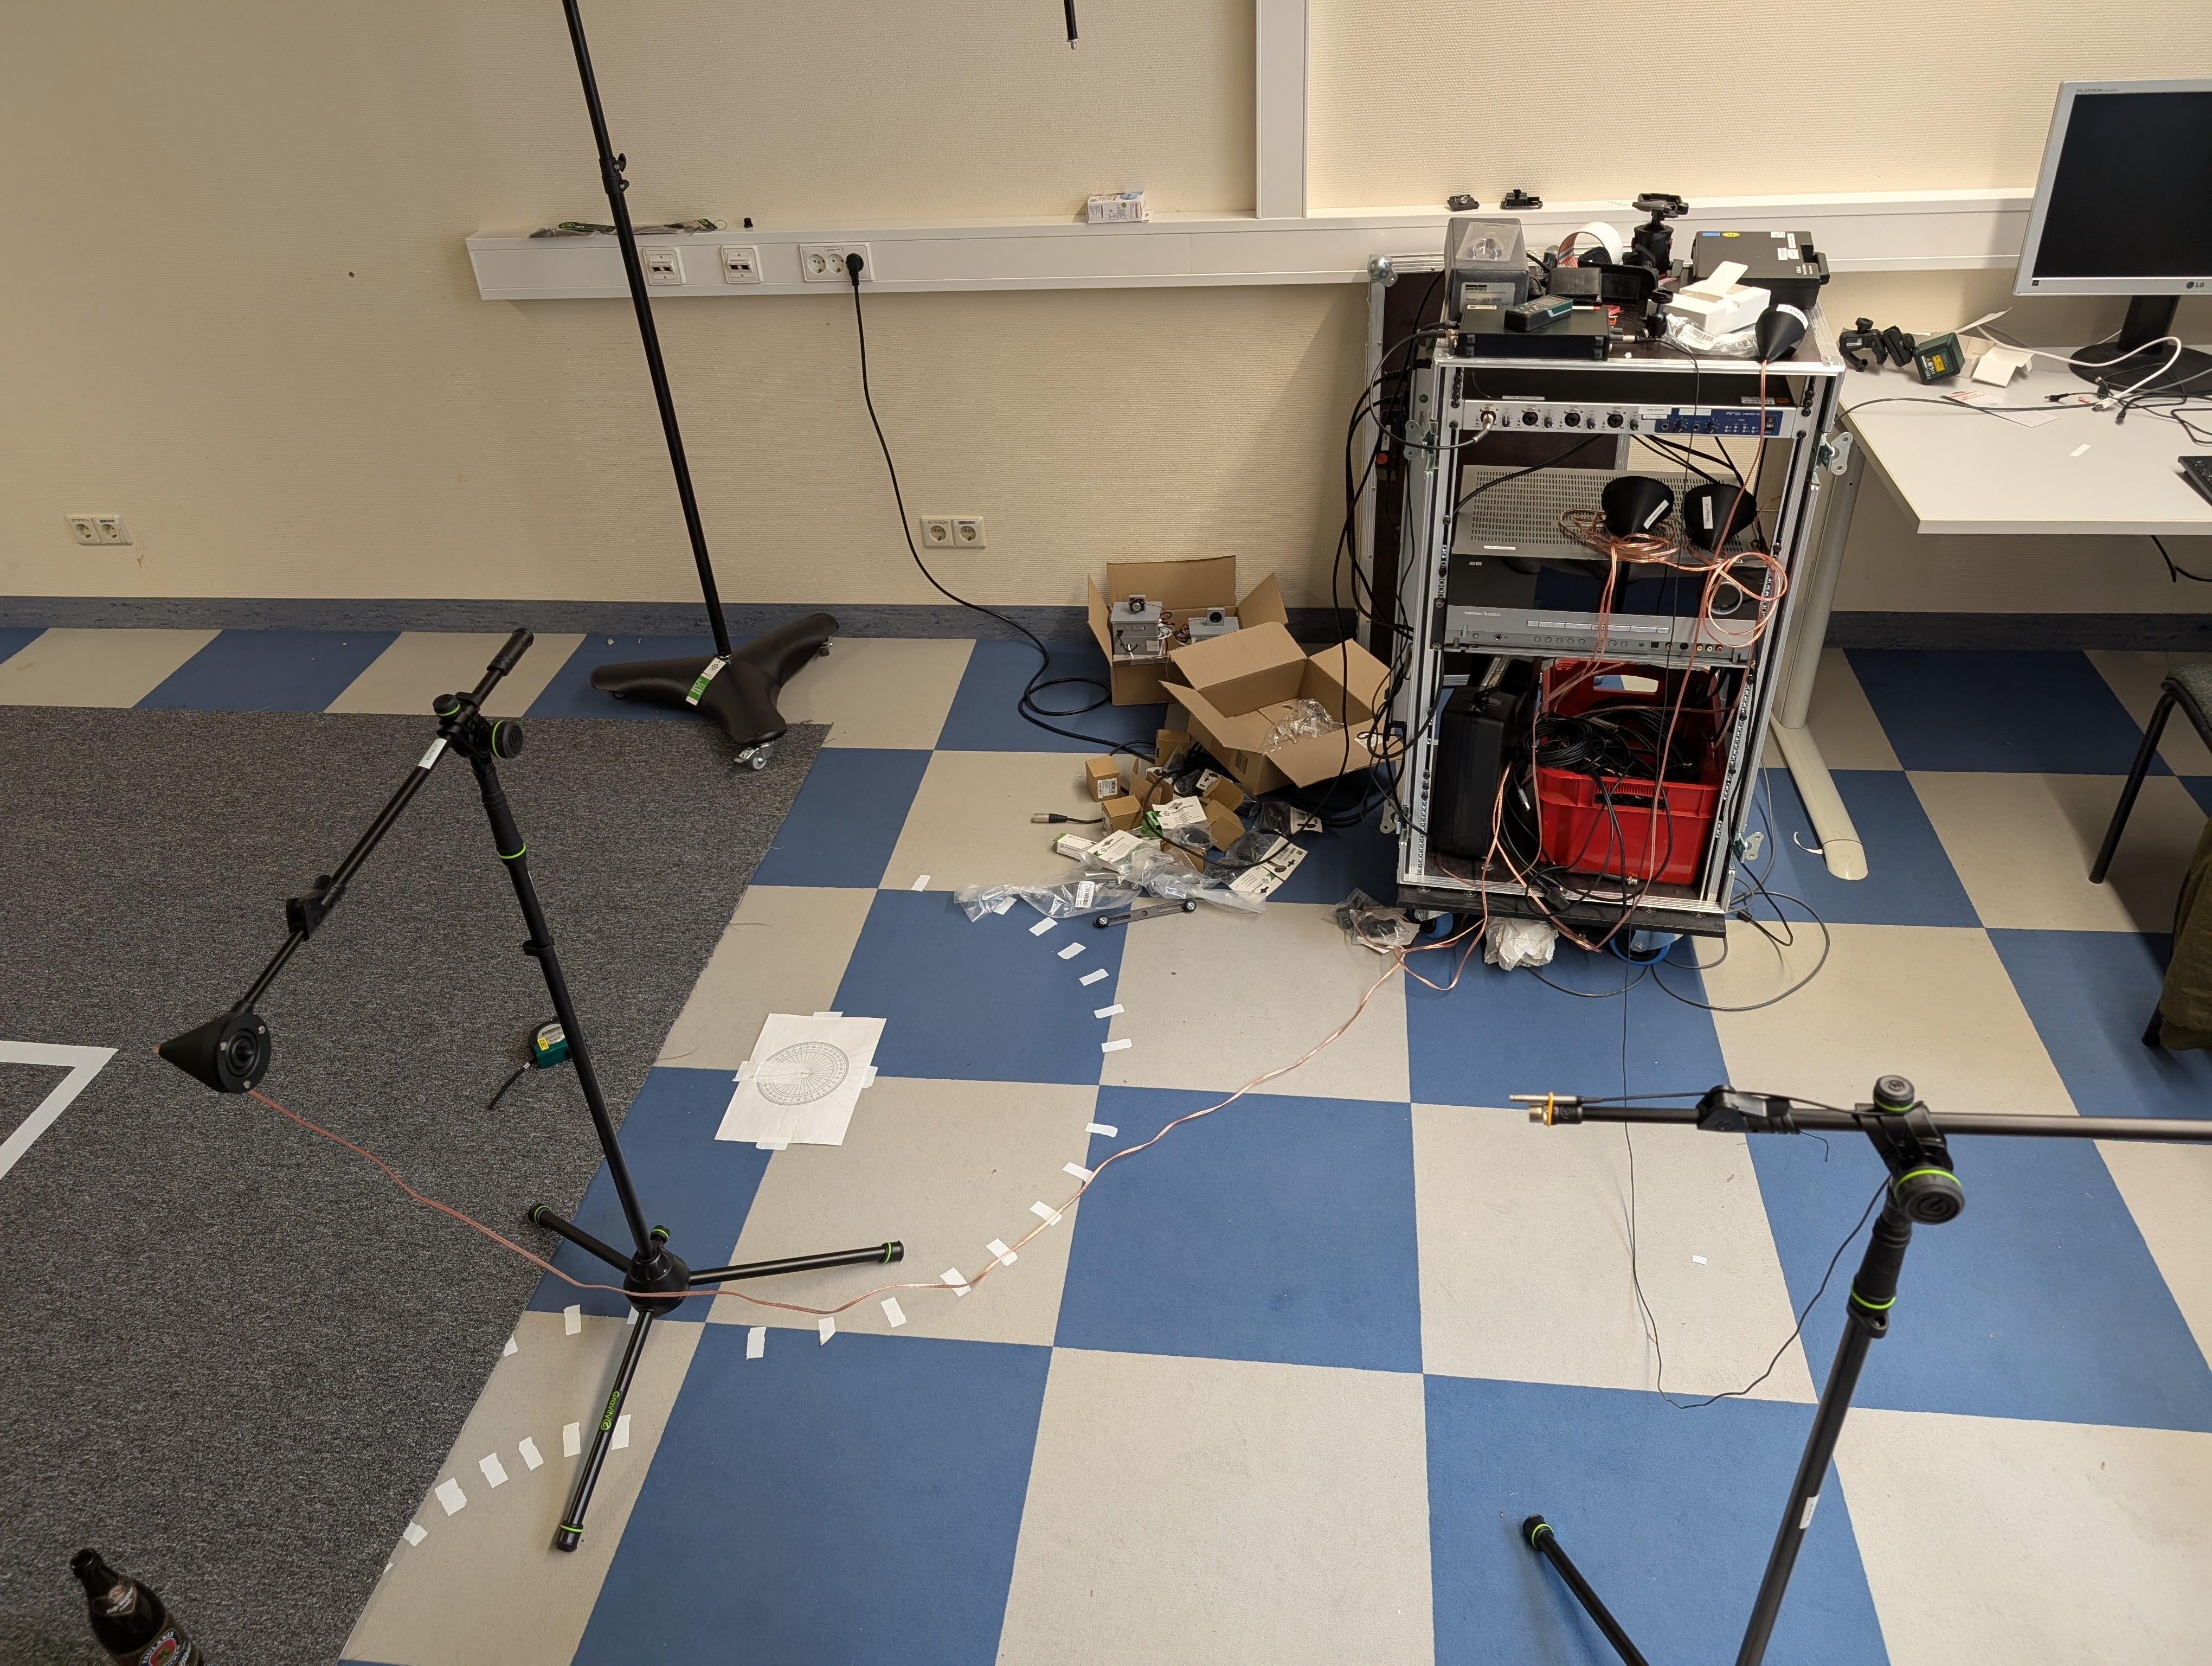

In [ ]:
from IPython.display import Image
Image(filename="./PXL_20250507_084633979.jpg")

# Fireface802 settings

Matrix routing

Mixer

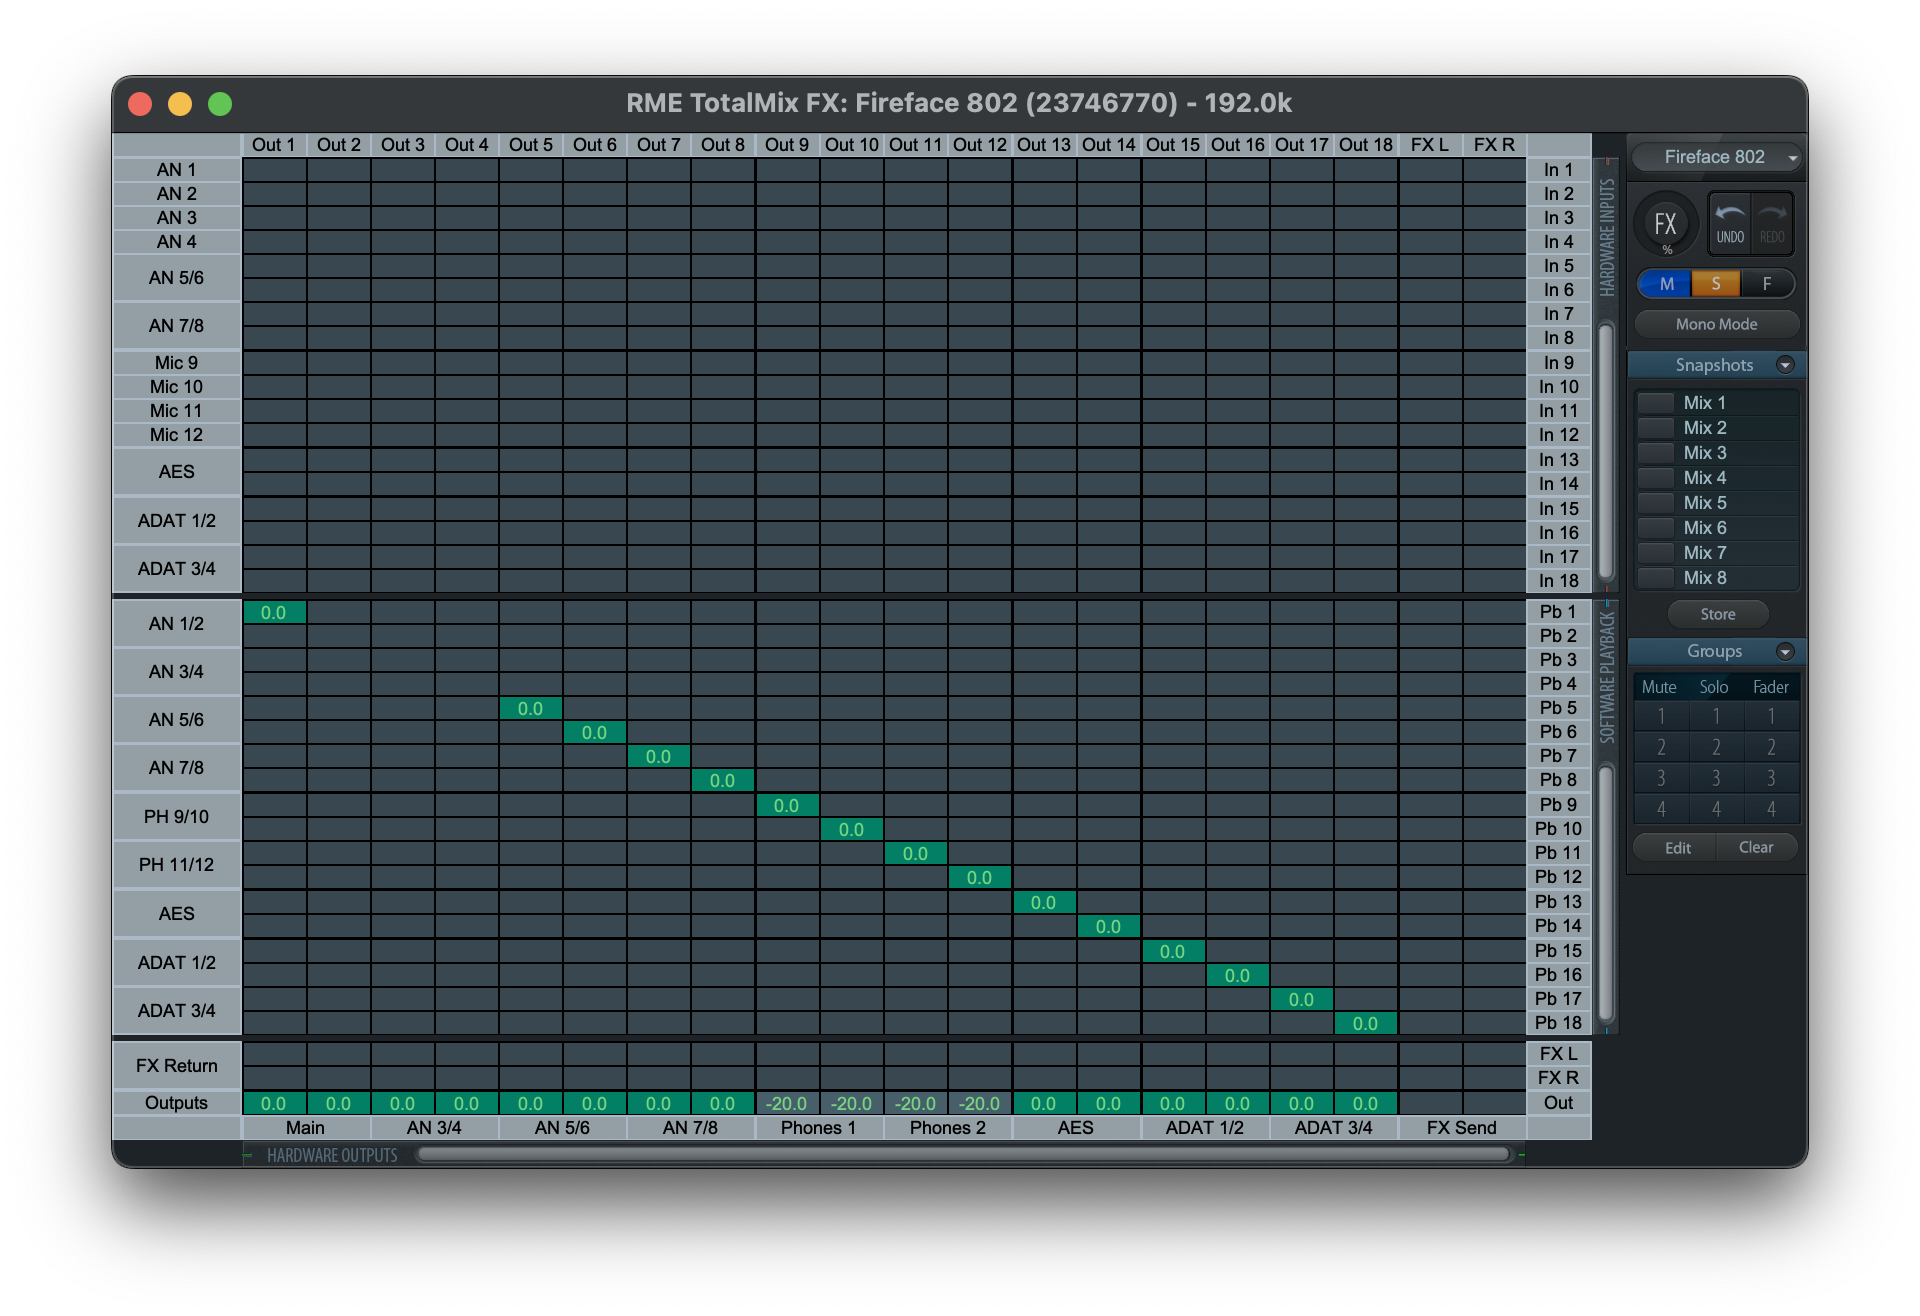

In [79]:
from IPython.display import Image
Image(filename="./rme802_matrix.png")

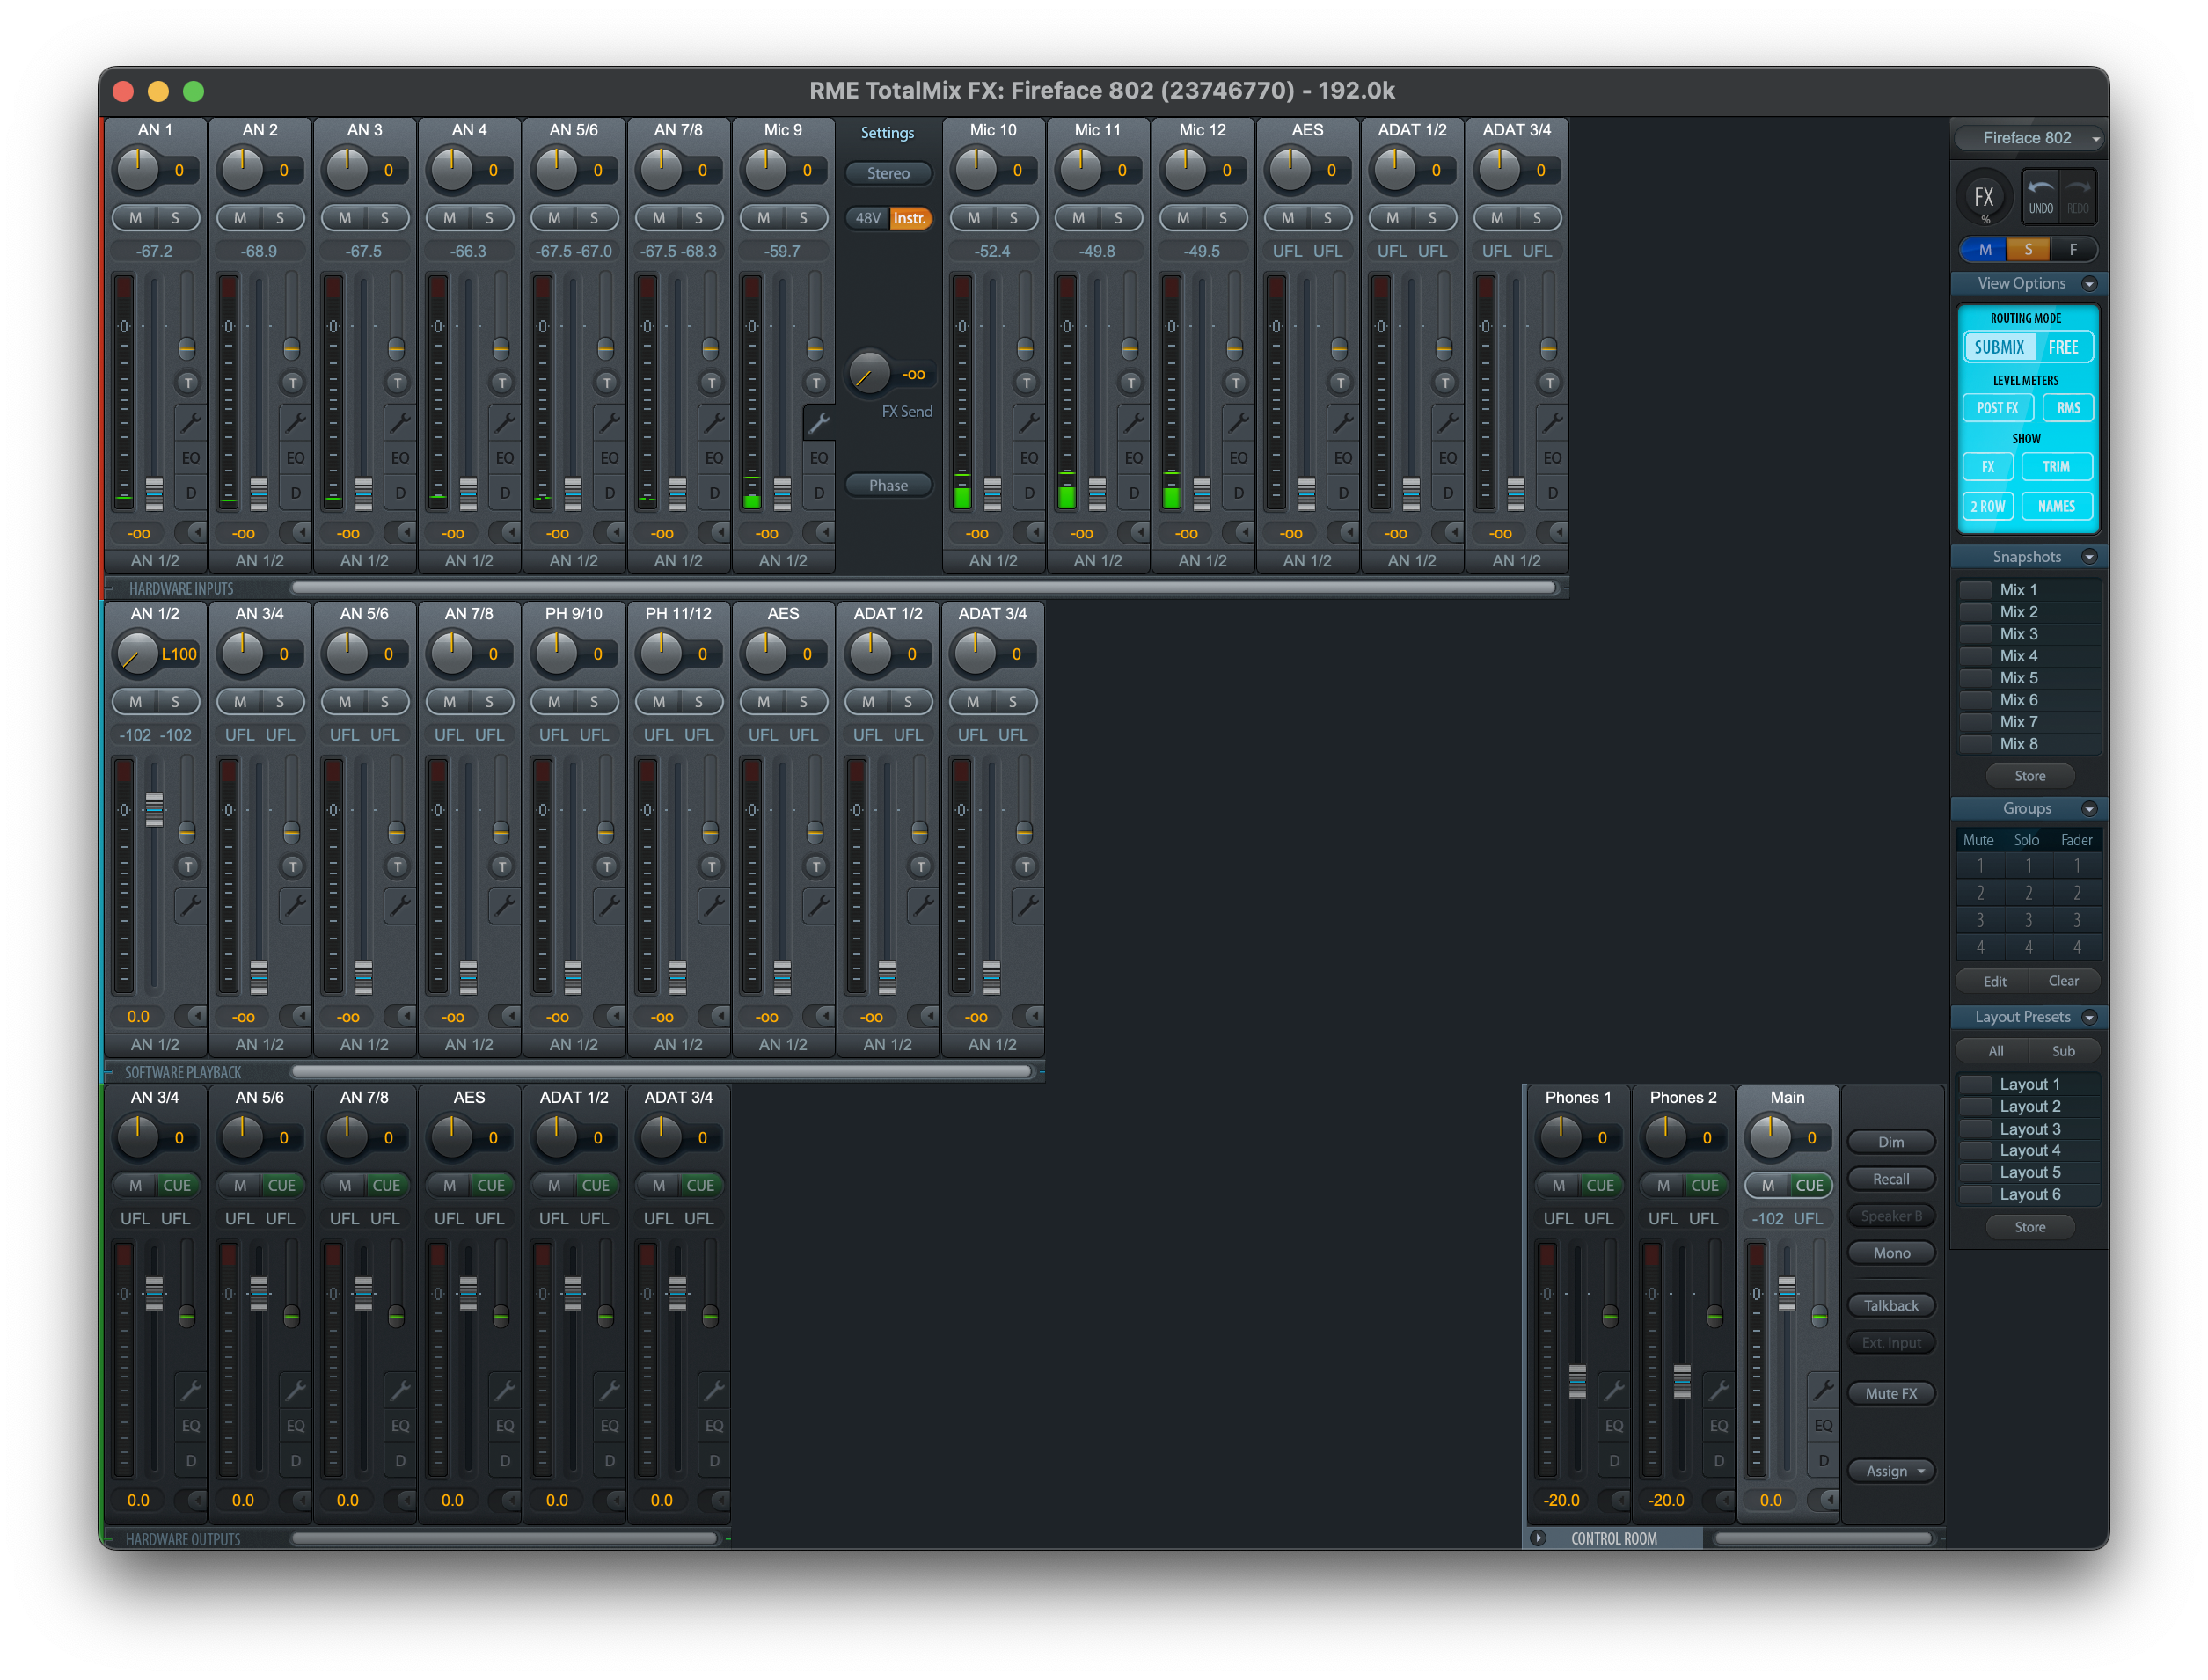

In [80]:
Image(filename="./rme802_mixer.png")

# Processing

In [81]:
# %%
import numpy as np
import os
import soundfile as sf
import matplotlib.pyplot as plt
import scipy.signal as signal

# Load audio files
DIR = "./2025-05-06/original/"  # Directory containing the audio files
DIR2 = "./2025-05-07/original/" 
audio_files = os.listdir(DIR)  # List all files in the sweeps directory
audio_files2 = os.listdir(DIR2)  # List all files in the sweeps directory
audio_files.sort()  # Sort the files in ascending order
audio_files2.sort()  # Sort the files in ascending order


TEST 1

Extracted Hour: 19, Min: 59, Sec: 03
Extracted Hour: 19, Min: 59, Sec: 34
Extracted Hour: 20, Min: 00, Sec: 05
Extracted Hour: 20, Min: 00, Sec: 36
Extracted Hour: 20, Min: 01, Sec: 07
Extracted Hour: 20, Min: 01, Sec: 39
Extracted Hour: 20, Min: 02, Sec: 10
Extracted Hour: 20, Min: 02, Sec: 41
Extracted Hour: 20, Min: 03, Sec: 12
Extracted Hour: 20, Min: 03, Sec: 43
Extracted Hour: 20, Min: 04, Sec: 14
Extracted Hour: 20, Min: 04, Sec: 45
Extracted Hour: 20, Min: 05, Sec: 16
Extracted Hour: 20, Min: 05, Sec: 48
Extracted Hour: 20, Min: 06, Sec: 19
Extracted Hour: 20, Min: 06, Sec: 50
Extracted Hour: 20, Min: 07, Sec: 21
Extracted Hour: 20, Min: 07, Sec: 52
Extracted Hour: 20, Min: 08, Sec: 23
Extracted Hour: 20, Min: 08, Sec: 54
RMS Values: [[0.09543886894007893, '19', '59', '03'], [0.09556033131373814, '19', '59', '34'], [0.09535893286241325, '20', '00', '05'], [0.0955033446444304, '20', '00', '36'], [0.09555129539403834, '20', '01', '07'], [0.09542281044220619, '20', '01', 

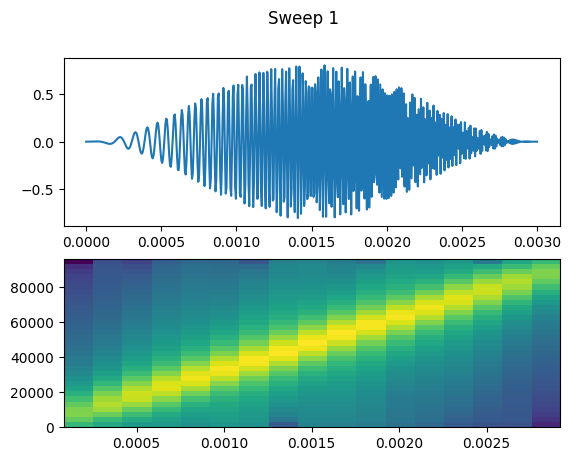

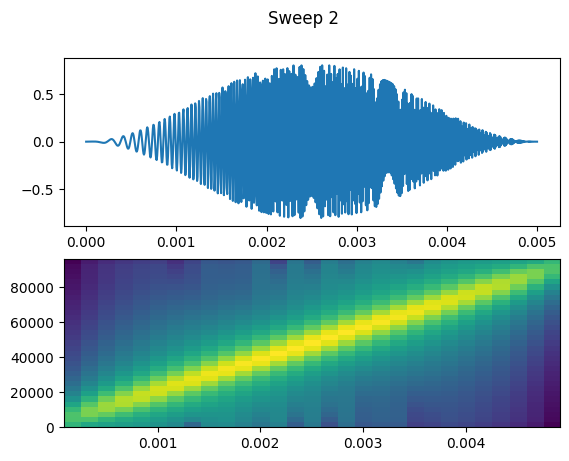

<Figure size 640x480 with 0 Axes>

In [82]:
# Define the matched filter function
def matched_filter(recording, chirp_template):
    chirp_template = chirp_template[::-1]  # Time-reversed chirp
    filtered_output = signal.fftconvolve(recording, chirp_template, mode='valid')
    return filtered_output

# Detect peaks in the matched filter output
def detect_peaks(filtered_output, threshold=0.5):
    peaks, _ = signal.find_peaks(filtered_output, height=threshold * np.max(filtered_output))
    return peaks

def compute_rms(audio_signal):
    """Compute the RMS of the audio signal."""
    return np.sqrt(np.mean(audio_signal**2))

def rms_to_db(rms_value):
    """Convert RMS value to decibels."""
    return 20 * np.log10(rms_value) if rms_value > 0 else -np.inf

DIR_first_sweep = "./2025-05-06/first_sweep/"  # Directory to save the first sweeps
DIR2_first_sweep = "./2025-05-07/first_sweep/"  # Directory to save the first sweeps
DIR_second_sweep = "./2025-05-06/first_sweep/"  # Directory to save the first sweeps
DIR2_second_sweep = "./2025-05-07/second_sweep/"  # Directory to save the first sweeps
os.makedirs(DIR_first_sweep, exist_ok=True)  # Create the directory if it doesn't exist
os.makedirs(DIR_second_sweep, exist_ok=True)  # Create the directory if it doesn't exist
os.makedirs(DIR2_first_sweep, exist_ok=True)  # Create the directory if it doesn't exist
os.makedirs(DIR2_second_sweep, exist_ok=True)  # Create the directory if it doesn't exist

durns = np.array([3, 5, 7] )*1e-3

fs = 192000 # Hz
t1 = np.linspace(0, durns[0], int(fs*durns[0]))
start_f1, end_f1 = 1e3, 95e3
sweep1 = signal.chirp(t1, start_f1, t1[-1], end_f1)
sweep1 *= signal.windows.tukey(sweep1.size, 0.95)
sweep1 *= 0.8
sweep1_padded = np.pad(sweep1, pad_width=[int(fs*0.1)]*2, constant_values=[0,0])

t2 = np.linspace(0, durns[1], int(fs*durns[1]))
start_f2, end_f2 = 1e3, 95e3
sweep2 = signal.chirp(t2, start_f2, t2[-1], end_f2)
sweep2 *= signal.windows.tukey(sweep2.size, 0.95)
sweep2 *= 0.8
sweep2_padded = np.pad(sweep2, pad_width=[int(fs*0.1)]*2, constant_values=[0,0])

dur1 = len(sweep1) / fs
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t1, sweep1)
plt.subplot(2, 1, 2)
plt.specgram(sweep1, NFFT=64, noverlap=32, Fs=fs)
plt.suptitle('Sweep 1')

dur2 = len(sweep2) / fs
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t2, sweep2)
plt.subplot(2, 1, 2)
plt.specgram(sweep2, NFFT=64, noverlap=32, Fs=fs)
plt.suptitle('Sweep 2')
plt.figure()

rms_values1 = []
db_values1 = []
rms_values2 = []
db_values2 = []

rms2_values1 = []
db2_values1 = []
rms2_values2 = []
db2_values2 = []

# TEST 1

print('\nTEST 1\n')

for file in audio_files:
    file_path = os.path.join(DIR, file)

    date = file.split('_')[1]
    date1 = date.split('g')[1]

    hour = file.split('_')[2]
    hour = hour.split('.')[0]
    hour = hour.split('-')[0]
    minute = file.split('_')[2]
    minute = minute.split('.')[0]
    minute = minute.split('-')[1]
    sec = file.split('_')[2]
    sec = sec.split('.')[0]
    sec = sec.split('-')[2]
    print(f"Extracted Hour: {hour}, Min: {minute}, Sec: {sec}")

    file_time = file.split('.')[0].split('_')[2]

    # Display all the sweep files to check for consistency

    #fig1, ax1 = plt.subplots(figsize=(15, 5))
    #ax1.set_title(file.split('_')[1] + f'\n Hour: {hour}, Minute: {minute}')
    #ax1.set_xlabel('Time (s)')
    #ax1.set_ylabel('RMS Value')
    #ax1.grid(True)

    #fig2, ax2 = plt.subplots(figsize=(15, 5))
    #ax2.set_title(file.split('_')[1] + f'\n Hour: {hour}, Minute: {minute}')
    #ax2.set_xlabel('Time (s)')
    #ax2.set_ylabel('RMS Value')
    #ax2.grid(True)

    recording, sample_rate = sf.read(DIR +file)

    # Apply matched filtering
    filtered_output1 = matched_filter(recording, sweep1)
    filtered_output2 = matched_filter(recording, sweep2)

    # Detect peaks
    peaks1 = detect_peaks(filtered_output1)
    peaks2 = detect_peaks(filtered_output2)

    if len(peaks1) > 0:
        # Extract the first sweep
        first_sweep_start = peaks1[0]
        first_sweep_end = first_sweep_start + len(sweep1)
        first_sweep = recording[first_sweep_start:first_sweep_end]

        rms_value = compute_rms(first_sweep)

        rms_values1.append([rms_value, hour, minute, sec])
        #print(rms_values)
        db_value = rms_to_db(rms_value)
        db_values1.append([db_value, hour, minute])

        sf.write(DIR_first_sweep + file_time + '.wav', first_sweep, int(fs))
        # Plot the first sweep
        #ax1.plot(np.linspace(0,len(first_sweep),len(first_sweep))/fs, first_sweep, label=file_time)

    if len(peaks2) > 0:
        # Extract the first sweep
        second_sweep_start = peaks2[0]
        second_sweep_end = second_sweep_start + len(sweep2)
        second_sweep = recording[second_sweep_start:second_sweep_end]

        rms_value = compute_rms(second_sweep)

        rms_values2.append([rms_value, hour, minute,sec])
        #print(rms_values)
        db_value = rms_to_db(rms_value)
        db_values2.append([db_value, hour, minute])

        sf.write(DIR_second_sweep + file_time + '.wav', second_sweep, int(fs))
        # Plot the first sweep
        #ax2.plot(np.linspace(0,len(second_sweep),len(second_sweep))/fs, second_sweep, label=file_time, color='orange')

print(f"RMS Values: {rms_values1}")
print(f"dB Values: {db_values1}")
print(f"RMS Values: {rms_values2}")
print(f"dB Values: {db_values2}")

#plt.show(block = True)
    

# TEST 2

print('\nTEST 2\n')

for file in audio_files2:
    file_path = os.path.join(DIR2, file)

    date = file.split('_')[1]
    date2 = date.split('g')[1]

    hour = file.split('_')[2]
    hour = hour.split('.')[0]
    hour = hour.split('-')[0]
    minute = file.split('_')[2]
    minute = minute.split('.')[0]
    minute = minute.split('-')[1]
    sec = file.split('_')[2]
    sec = sec.split('.')[0]
    sec = sec.split('-')[2]
    print(f"Extracted Hour: {hour}, Min: {minute}, Sec: {sec}")

    file_time = file.split('.')[0].split('_')[2]

    # Display all the sweep files to check for consistency

    #fig1, ax1 = plt.subplots(figsize=(15, 5))
    #ax1.set_title(file.split('_')[1] + f'\n Hour: {hour}, Minute: {minute}')
    #ax1.set_xlabel('Time (s)')
    #ax1.set_ylabel('RMS Value')
    #ax1.grid(True)

    #fig2, ax2 = plt.subplots(figsize=(15, 5))
    #ax2.set_title(file.split('_')[1] + f'\n Hour: {hour}, Minute: {minute}')
    #ax2.set_xlabel('Time (s)')
    #ax2.set_ylabel('RMS Value')
    #ax2.grid(True)

    recording, sample_rate = sf.read(DIR2 +file)

    # Apply matched filtering
    filtered_output1 = matched_filter(recording, sweep1)
    filtered_output2 = matched_filter(recording, sweep2)

    # Detect peaks
    peaks1 = detect_peaks(filtered_output1)
    peaks2 = detect_peaks(filtered_output2)

    if len(peaks1) > 0:
        # Extract the first sweep
        first_sweep_start = peaks1[0]
        first_sweep_end = first_sweep_start + len(sweep1)
        first_sweep = recording[first_sweep_start:first_sweep_end]

        rms_value = compute_rms(first_sweep)

        rms2_values1.append([rms_value, hour, minute, sec])
        #print(rms_values)
        db_value = rms_to_db(rms_value)
        db2_values1.append([db_value, hour, minute])

        sf.write(DIR2_first_sweep + file_time + '.wav', first_sweep, int(fs))
        # Plot the first sweep
        #ax1.plot(np.linspace(0,len(first_sweep),len(first_sweep))/fs, first_sweep, label=file_time)

    if len(peaks2) > 0:
        # Extract the first sweep
        second_sweep_start = peaks2[0]
        second_sweep_end = second_sweep_start + len(sweep2)
        second_sweep = recording[second_sweep_start:second_sweep_end]

        rms_value = compute_rms(second_sweep)

        rms2_values2.append([rms_value, hour, minute,sec])
        #print(rms_values)
        db_value = rms_to_db(rms_value)
        db2_values2.append([db_value, hour, minute])

        sf.write(DIR2_second_sweep + file_time + '.wav', second_sweep, int(fs))
        # Plot the first sweep
        #ax2.plot(np.linspace(0,len(second_sweep),len(second_sweep))/fs, second_sweep, label=file_time, color='orange')

print(f"RMS Values: {rms2_values1}")
print(f"dB Values: {db2_values1}")
print(f"RMS Values: {rms2_values2}")
print(f"dB Values: {db2_values2}")

#plt.show(block = True)

# Results

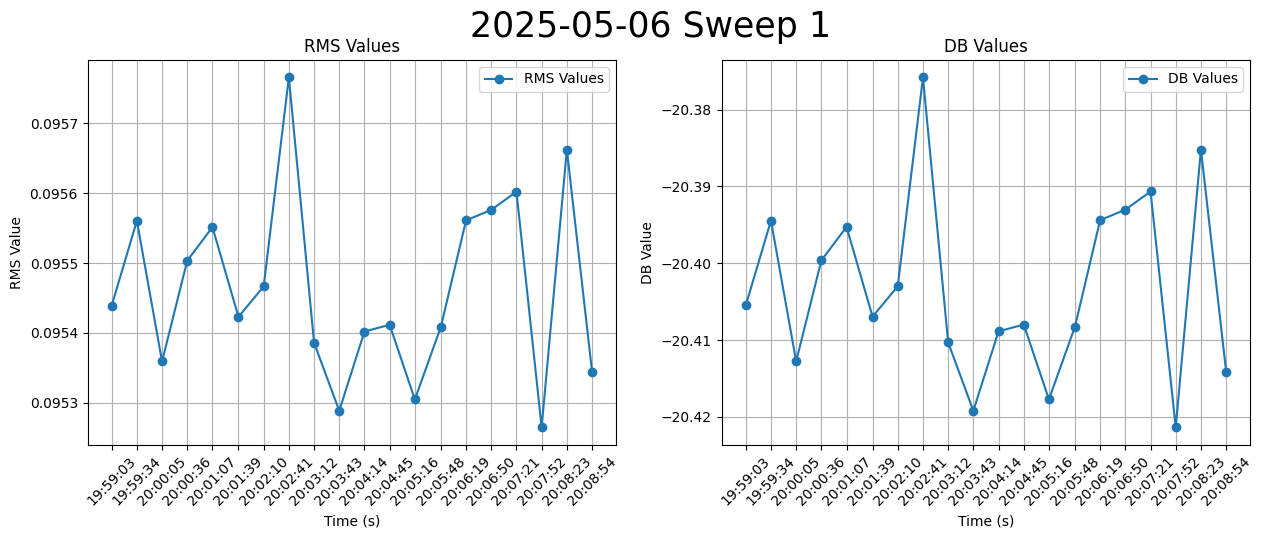

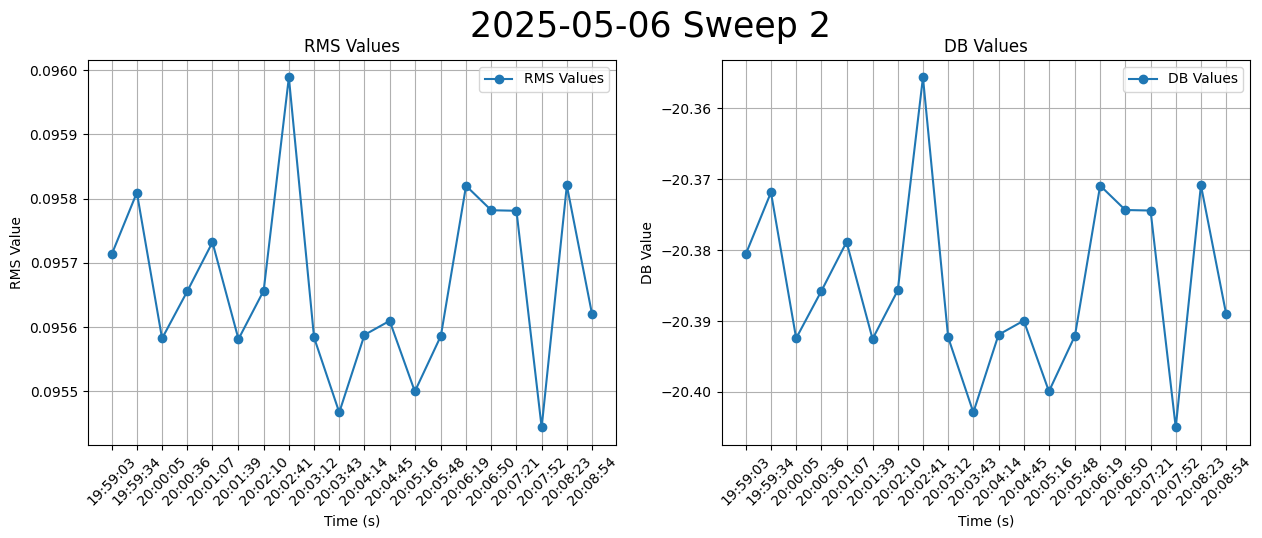

In [84]:
# first sweep analysis

# plot rms values and db values
fig, axs = plt.subplots(1, 2, figsize=(15,5))
ax = axs[0]
ax.set_title('RMS Values')
ax.set_xlabel('Time (s)')
ax.set_ylabel('RMS Value')
ax.grid(True)
time = [f"{val[1]}:{val[2]}:{val[3]}" for val in rms_values1]
time_in_seconds = [int(val[1]) * 3600 + int(val[2]) * 60 + int(val[3]) for val in rms_values1]
ax.plot(time_in_seconds, [val[0] for val in rms_values1], label='RMS Values', marker='o')
ax.legend()
ax.set_xticks(time_in_seconds)
ax.set_xticklabels(time, rotation=45)
# plot db values
ax = axs[1]
ax.set_title('DB Values')
ax.set_xlabel('Time (s)')
ax.set_ylabel('DB Value')
ax.grid(True)
ax.plot(time_in_seconds, [val[0] for val in db_values1], label='DB Values', marker='o')
ax.legend()
ax.set_xticks(time_in_seconds)
ax.set_xticklabels(time, rotation=45)
#ax.set_yticks(np.arange(np.floor(min([val[0] for val in db_values1])*10)/10, np.ceil(max([val[0] for val in db_values1])*10)/10, 0.2))
plt.suptitle(date1 + ' Sweep 1', fontsize=25)


# second sweep analysis

# plot rms values and db values
fig, axs = plt.subplots(1, 2, figsize=(15,5))
ax = axs[0]
ax.set_title('RMS Values')
ax.set_xlabel('Time (s)')
ax.set_ylabel('RMS Value')
ax.grid(True)
time = [f"{val[1]}:{val[2]}:{val[3]}" for val in rms_values2]
time_in_seconds = [int(val[1]) * 3600 + int(val[2]) * 60 + int(val[3]) for val in rms_values2]
ax.plot(time_in_seconds, [val[0] for val in rms_values2], label='RMS Values', marker='o')
ax.legend()
ax.set_xticks(time_in_seconds)
ax.set_xticklabels(time, rotation=45)
# plot db values
ax = axs[1]
ax.set_title('DB Values')
ax.set_xlabel('Time (s)')
ax.set_ylabel('DB Value')
ax.grid(True)
ax.plot(time_in_seconds, [val[0] for val in db_values2], label='DB Values', marker='o')
ax.legend()
ax.set_xticks(time_in_seconds)
ax.set_xticklabels(time, rotation=45)
#ax.set_yticks(np.arange(np.floor(min([val[0] for val in db_values2])*10)/10, np.ceil(max([val[0] for val in db_values2])*10)/10, 0.2))
plt.suptitle(date1 + ' Sweep 2', fontsize=25)

plt.show(block = False)

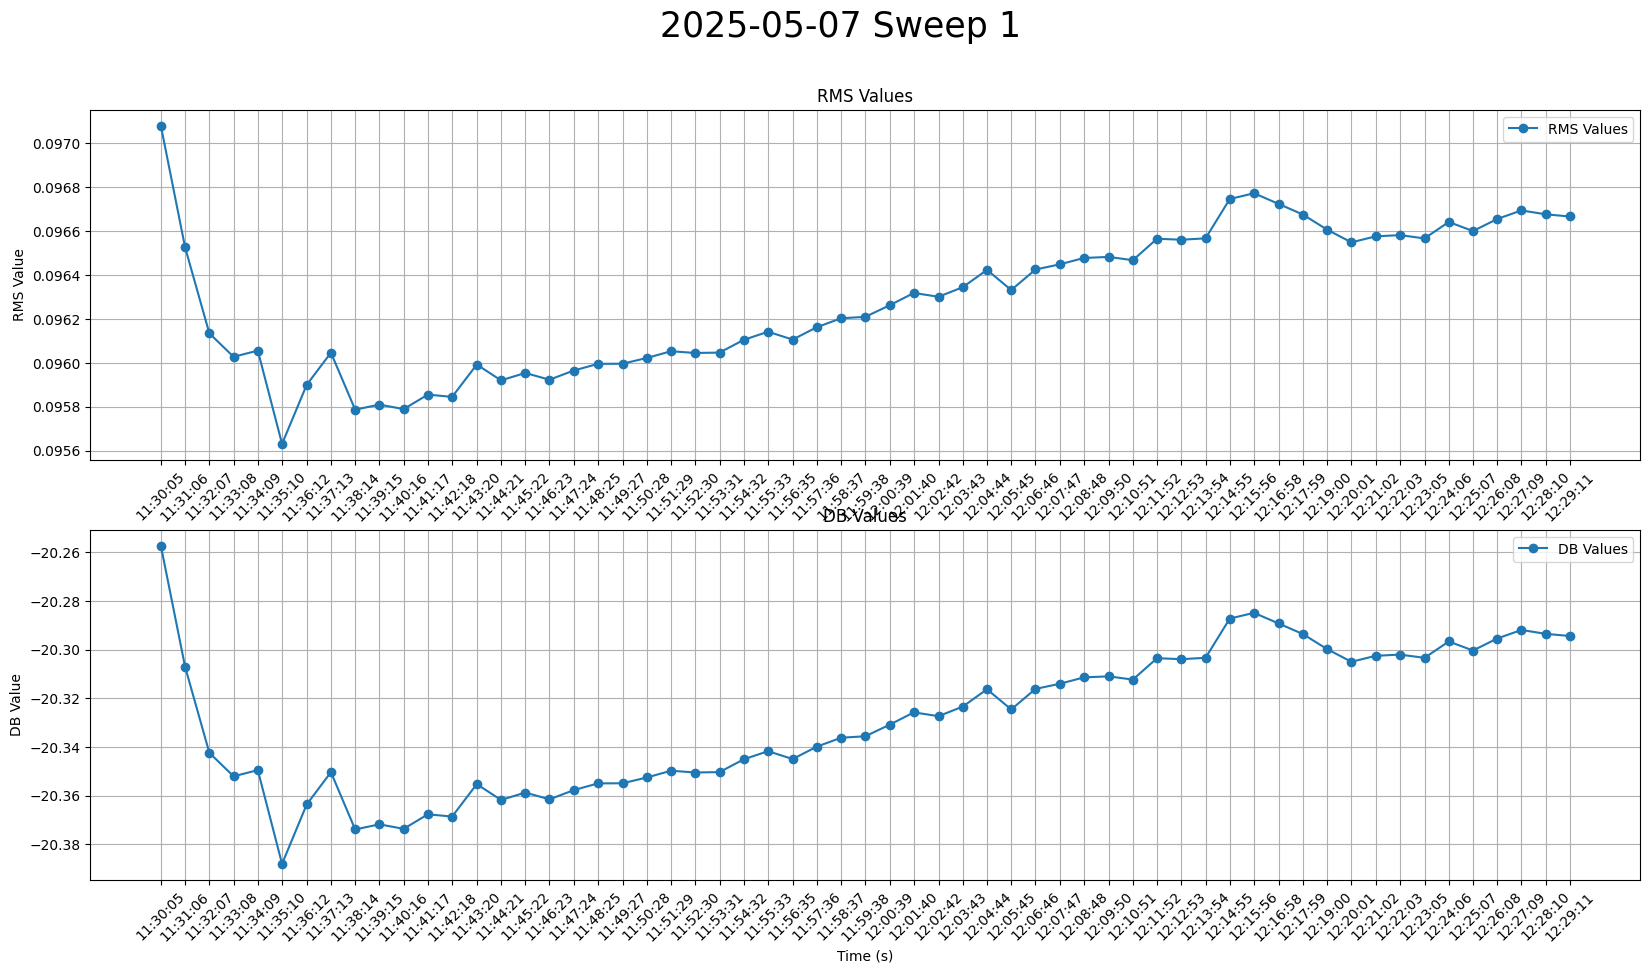

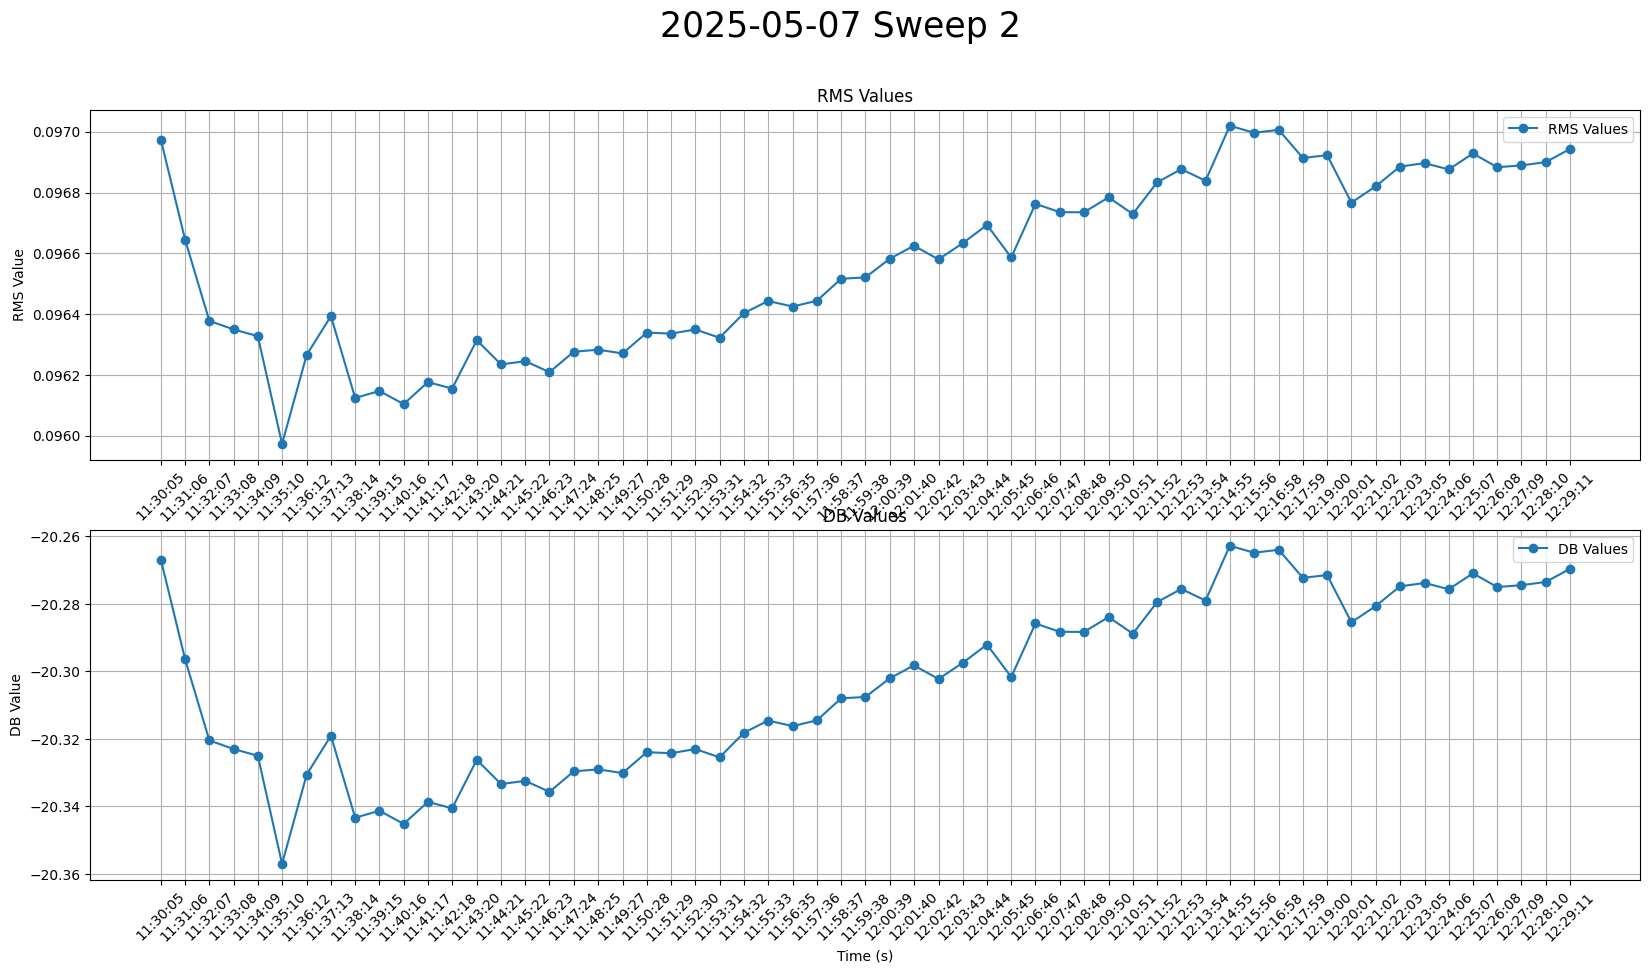

In [91]:
# first sweep analysis

# plot rms values and db values
fig, axs = plt.subplots(2, 1, figsize=(20,10))
ax = axs[0]
ax.set_title('RMS Values')
ax.set_xlabel('Time (s)')
ax.set_ylabel('RMS Value')
ax.grid(True)
time = [f"{val[1]}:{val[2]}:{val[3]}" for val in rms2_values1]
time_in_seconds = [int(val[1]) * 3600 + int(val[2]) * 60 + int(val[3]) for val in rms2_values1]
ax.plot(time_in_seconds, [val[0] for val in rms2_values1], label='RMS Values', marker='o')
ax.legend()
ax.set_xticks(time_in_seconds)
ax.set_xticklabels(time, rotation=45)
# plot db values
ax = axs[1]
ax.set_title('DB Values')
ax.set_xlabel('Time (s)')
ax.set_ylabel('DB Value')
ax.grid(True)
ax.plot(time_in_seconds, [val[0] for val in db2_values1], label='DB Values', marker='o')
ax.legend()
ax.set_xticks(time_in_seconds)
ax.set_xticklabels(time, rotation=45)
#ax.set_yticks(np.arange(np.floor(min([val[0] for val in db_values1])*10)/10, np.ceil(max([val[0] for val in db_values1])*10)/10, 0.2))
plt.suptitle(date2 + ' Sweep 1', fontsize=25)


# second sweep analysis

# plot rms values and db values
fig, axs = plt.subplots(2, 1, figsize=(20,10))
ax = axs[0]
ax.set_title('RMS Values')
ax.set_xlabel('Time (s)')
ax.set_ylabel('RMS Value')
ax.grid(True)
time = [f"{val[1]}:{val[2]}:{val[3]}" for val in rms2_values2]
time_in_seconds = [int(val[1]) * 3600 + int(val[2]) * 60 + int(val[3]) for val in rms2_values2]
ax.plot(time_in_seconds, [val[0] for val in rms2_values2], label='RMS Values', marker='o')
ax.legend()
ax.set_xticks(time_in_seconds)
ax.set_xticklabels(time, rotation=45)
# plot db values
ax = axs[1]
ax.set_title('DB Values')
ax.set_xlabel('Time (s)')
ax.set_ylabel('DB Value')
ax.grid(True)
ax.plot(time_in_seconds, [val[0] for val in db2_values2], label='DB Values', marker='o')
ax.legend()
ax.set_xticks(time_in_seconds)
ax.set_xticklabels(time, rotation=45)
#ax.set_yticks(np.arange(np.floor(min([val[0] for val in db_values2])*10)/10, np.ceil(max([val[0] for val in db_values2])*10)/10, 0.2))
plt.suptitle(date2 + ' Sweep 2', fontsize=25)

plt.show(block = False)